# Model HMXBs using an MCMC algorithm, using available constraints

## Jeff J. Andrews, Andreas Zezas, & Tassos Fragos

Our first goal is to model a HMXB such as PSR J0045-7319 in the SMC:

$$\alpha = 00:45:35.26$$
$$\delta = -73:19:03.32$$
$$P_{\rm orb} = 51.169\ {\rm days} $$
$$e = 0.808$$
$$M_2 \approx 11\ M_{\odot}\ {\rm (B1\ V\ star)}$$ 

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import corner
import density_contour
import pickle
from astropy.coordinates import SkyCoord
from astropy import units as u
import time

%matplotlib inline

sys.path.append('../SF_history')
import sf_history
sys.path.append('../stats')
import stats
sys.path.append('../binary')
import binary_evolve
sys.path.append('../pop_synth')
import pop_synth
import load_sse


/Library/Python/2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [3]:
corner.corner?

In [2]:

# Set J0045 parameters
coor_J0045 = SkyCoord('00h45m35.26s', '-73d19m03.32s')

ra_J0045 = coor_J0045.ra.degree
dec_J0045 = coor_J0045.dec.degree
M2_d_J0045 = 8.8  # M2 in Msun
M2_d_J0045_err = 1.8
P_orb_J0045 = 51.17  # P_orb in days
P_orb_J0045_err = 1.0
ecc_J0045 = 0.808  # eccentricity
ecc_J0045_err = 0.05


In [3]:
sampler_J0045 = pickle.load( open( "../data/J0045_MCMC_sampler.obj", "rb" ) )


In [7]:

ra_dist = sampler_J0045.flatchain.T[7]
dec_dist = sampler_J0045.flatchain.T[8]
sf_history.get_SMC_plot_polar(54.0)
#sf_history.get_SMC_plot_polar(54.0, ra_dist=ra_dist, dec_dist=dec_dist, ra=ra_J0045, dec=dec_J0045)
#plt.axvline(ra_J0045, color='k')
#plt.axhline(dec_J0045, color='k')
#plt.scatter(0.5, 16.6)


plt.show()

AttributeError: 'module' object has no attribute 'get_SMC_plot_polar'

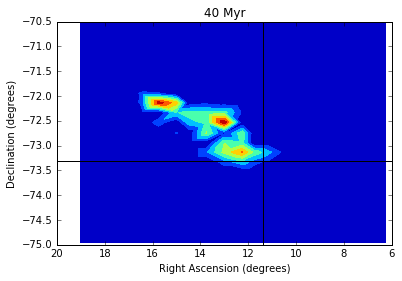

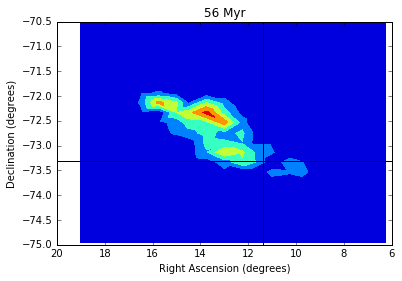

In [3]:
ax = plt.figure()

sf_history.get_SMC_plot(40.0)
plt.axvline(ra_J0045, color='k')
plt.axhline(dec_J0045, color='k')
plt.show()
sf_history.get_SMC_plot(56.0)
plt.axvline(ra_J0045, color='k')
plt.axhline(dec_J0045, color='k')

#plt.xlim(14,12)
#plt.ylim(-73.5,-72.0)

plt.show()

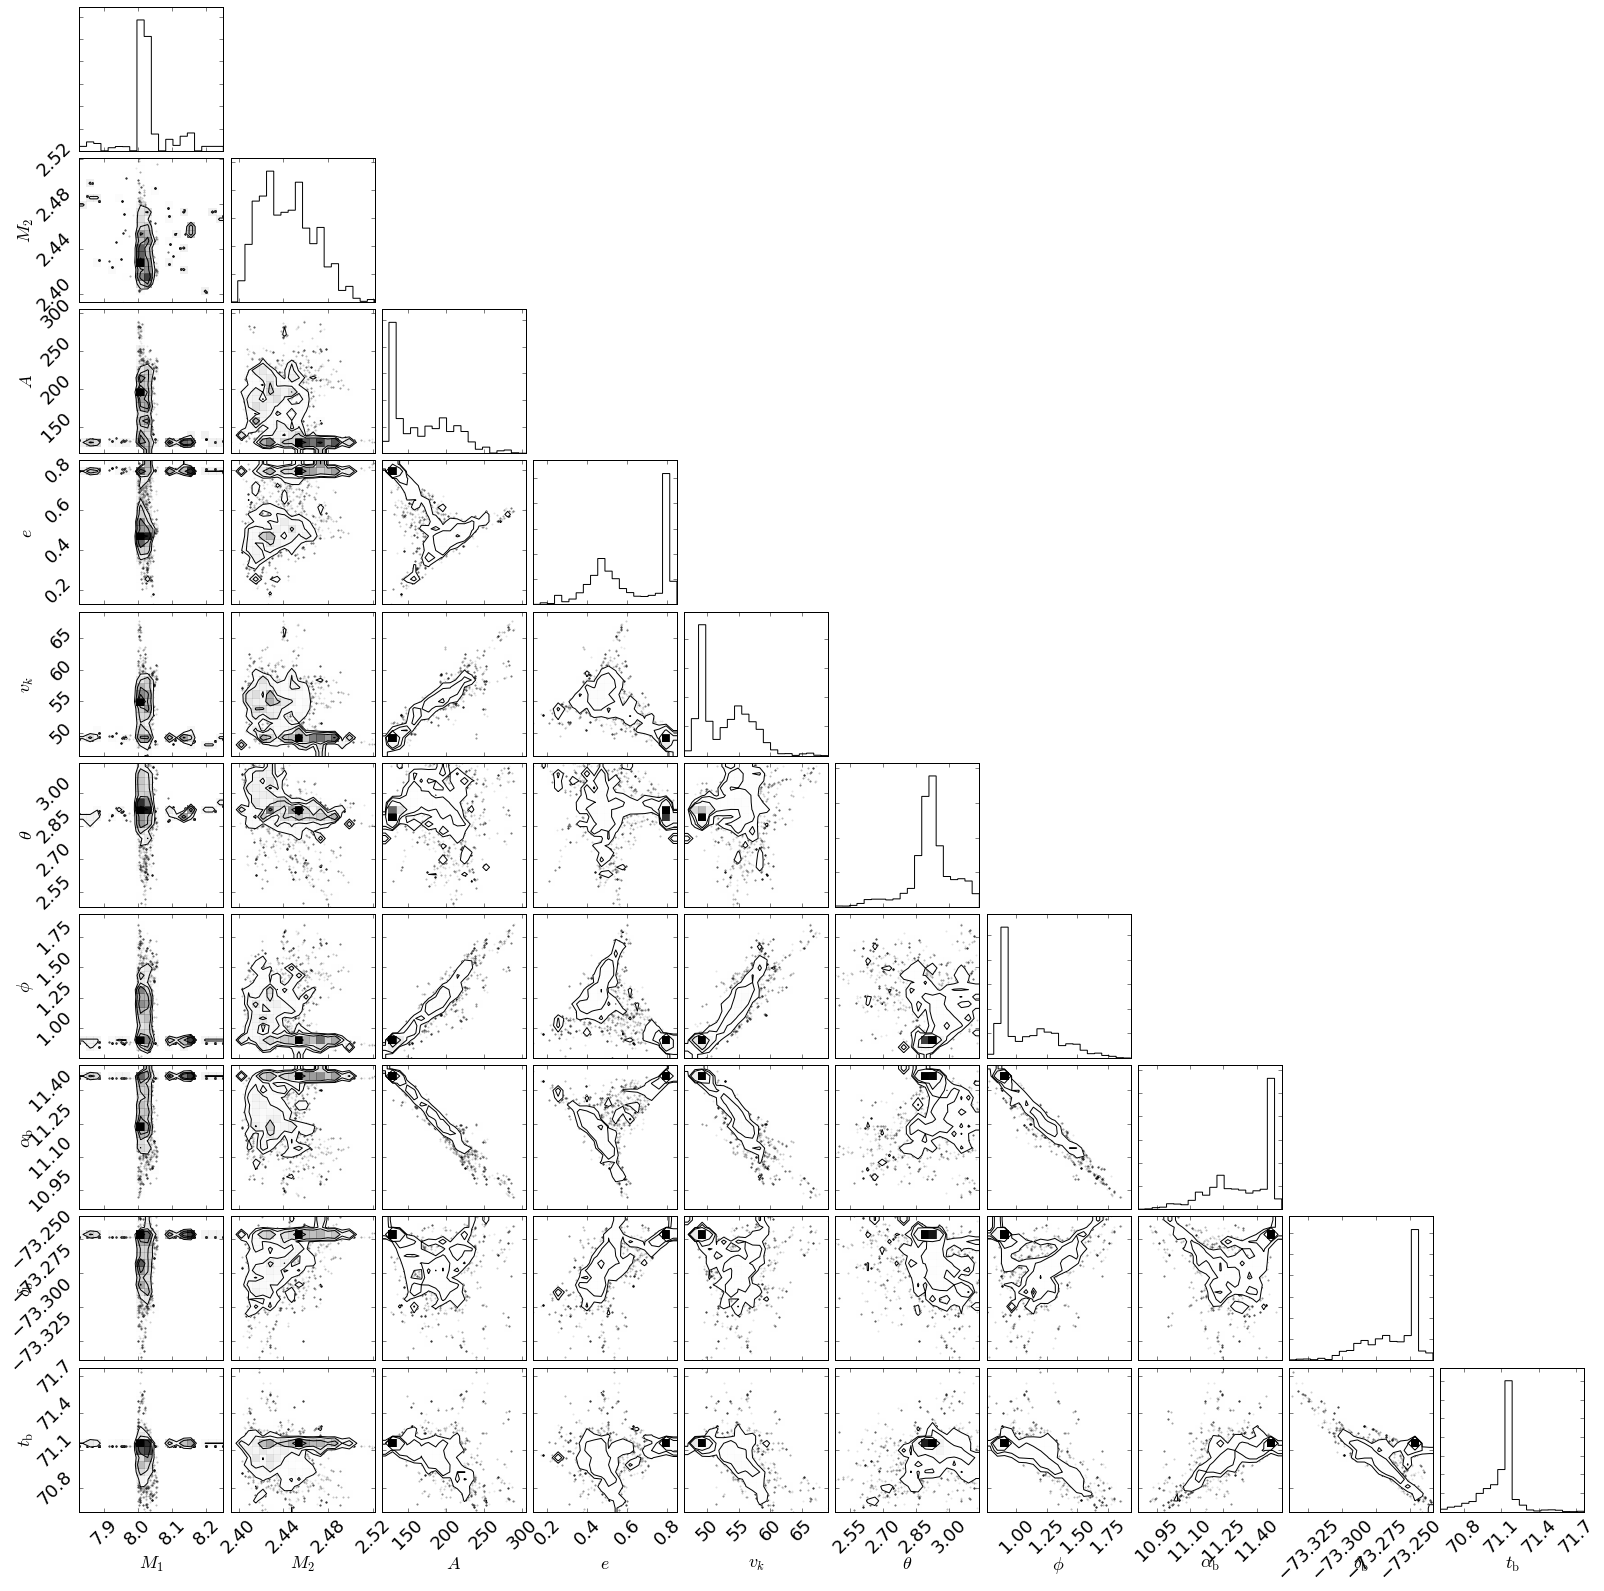

In [4]:
labels = [r"$M_1$", r"$M_2$", r"$A$", r"$e$", r"$v_k$", r"$\theta$", r"$\phi$", r"$\alpha_{\rm b}$", r"$\delta_{\rm b}$", r"$t_{\rm b}$"]
fig = corner.corner(sampler.flatchain, labels=labels)

plt.rc('font', size=18)

plt.show()
#plt.savefig('../figures/J0045_corner.pdf')

plt.rc('font', size=10)

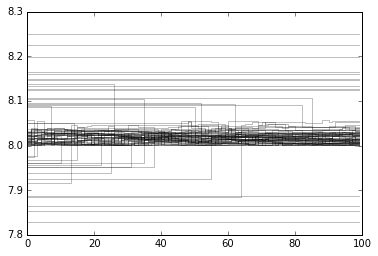

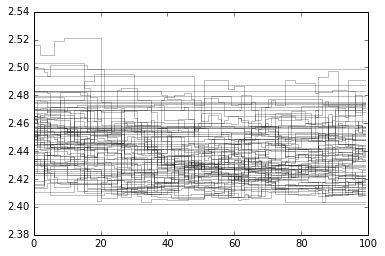

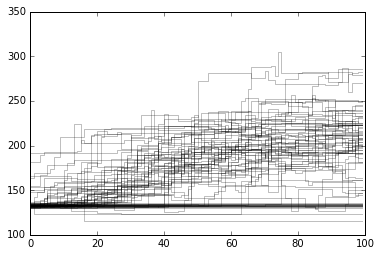

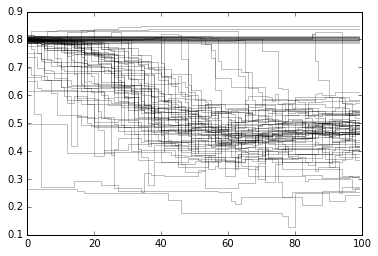

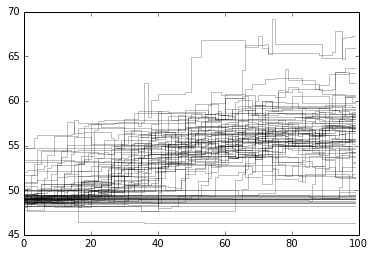

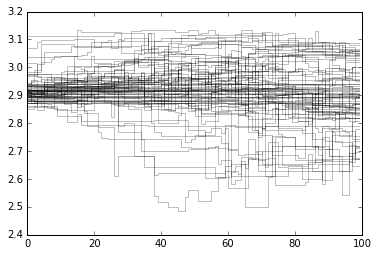

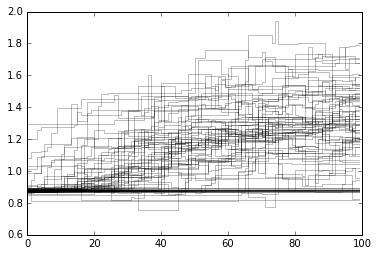

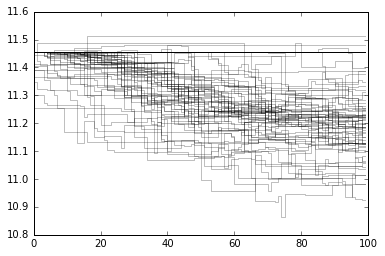

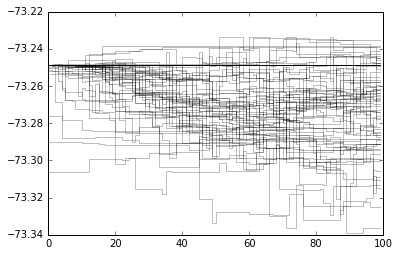

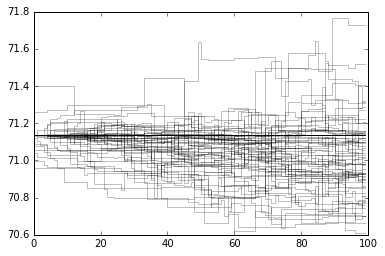

In [5]:
for i in range(sampler.dim):
    plt.figure()
    for chain in sampler.chain[...,i]:
        plt.plot(chain, alpha=0.25, color='k', drawstyle='steps')
        
plt.show()
#plt.savefig('../figures/J0045_chains.pdf')
        

In [3]:
start_time = time.time()
sampler = stats.run_emcee_population(nburn=10, nsteps=100)
print "Simulation took", time.time()-start_time, "seconds"

/Library/Python/2.7/site-packages/emcee/ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
/Library/Python/2.7/site-packages/emcee/ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))
../stats/stats.py:422: RuntimeWarning: invalid value encountered in log
  lp += np.log( norm_const / A )


Simulation took 174.484487057 seconds


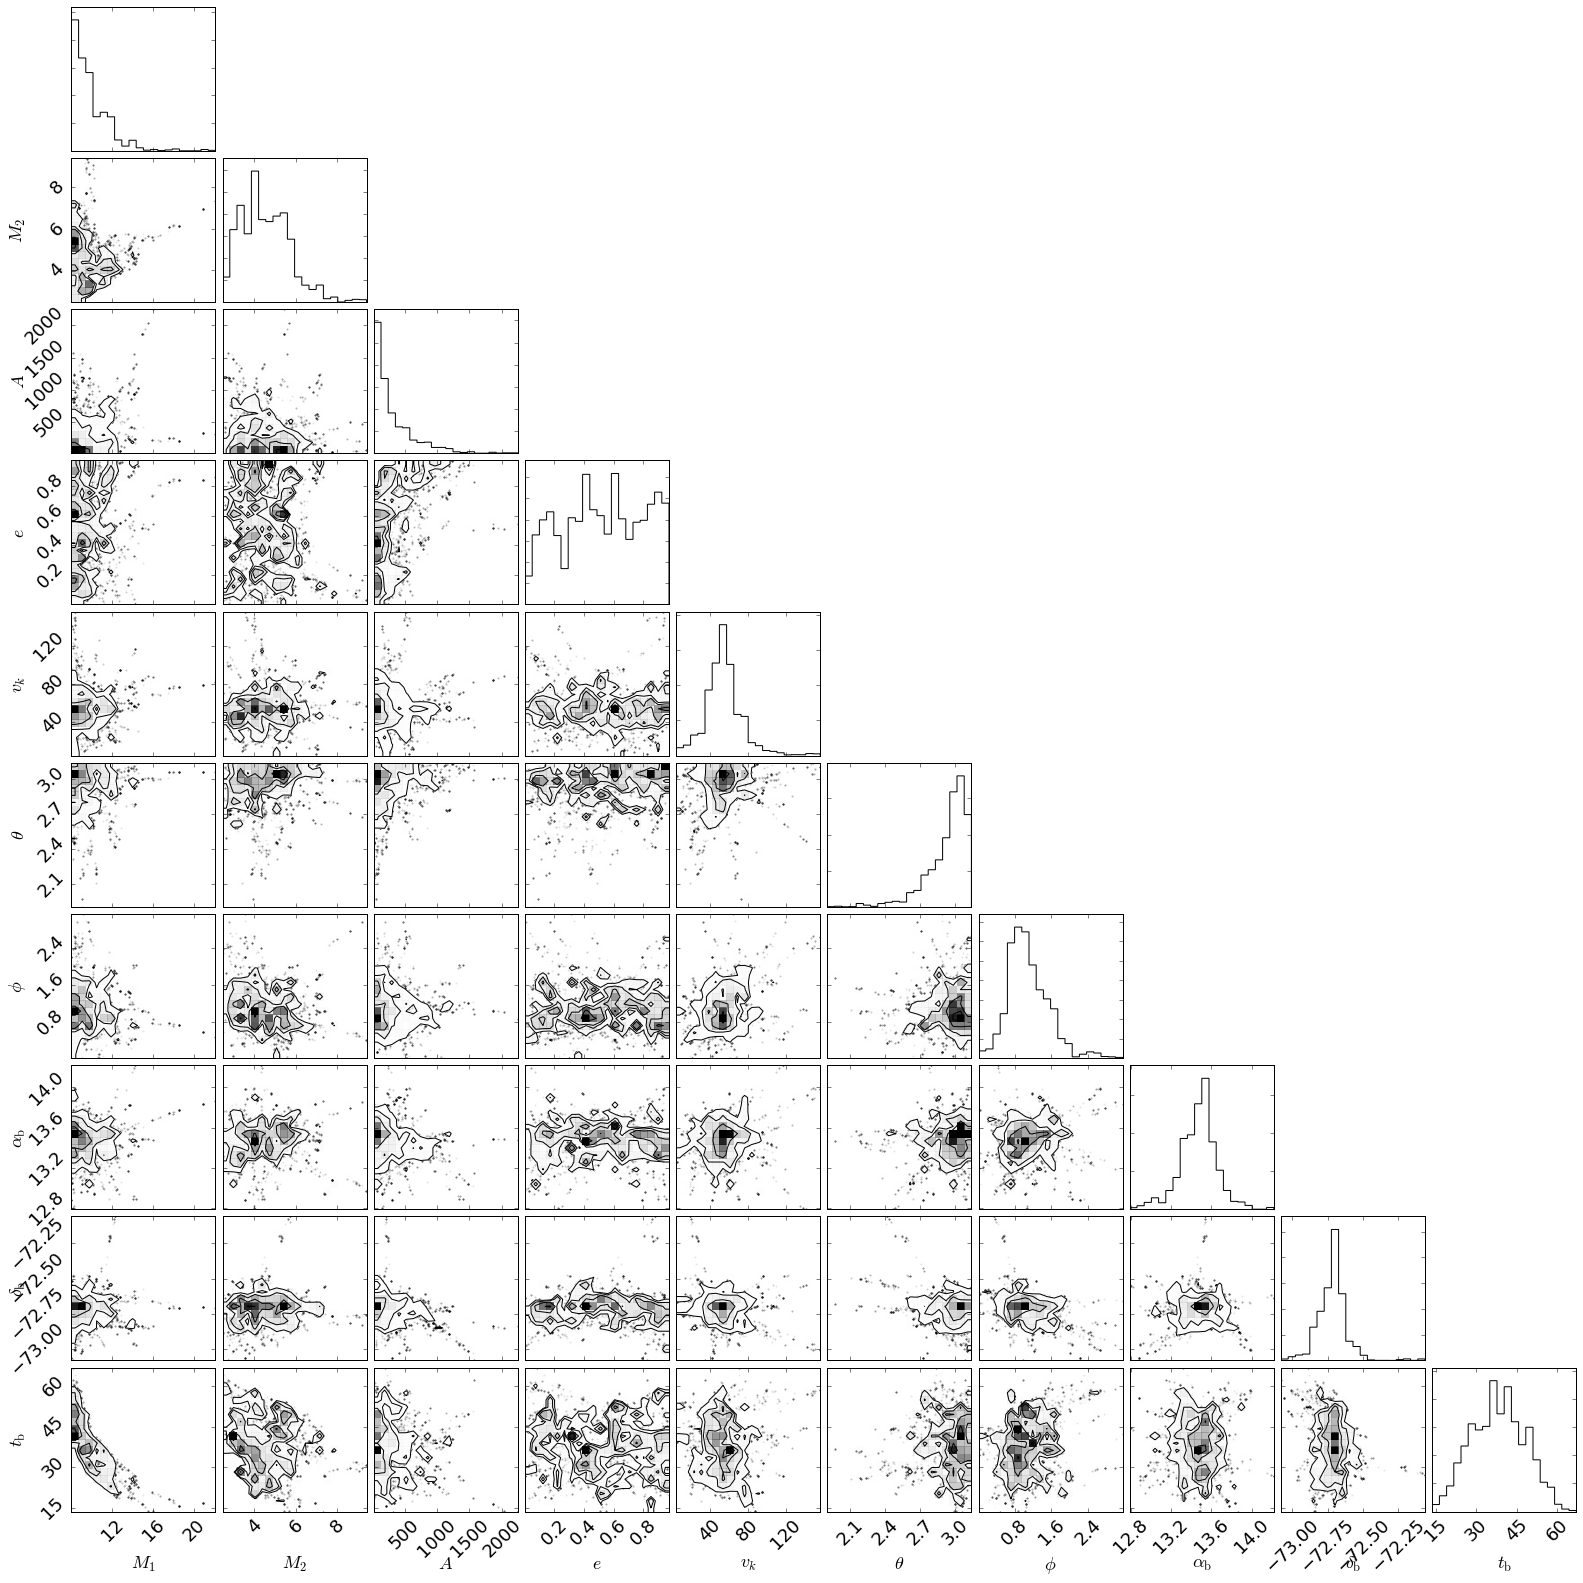

In [4]:
labels = [r"$M_1$", r"$M_2$", r"$A$", r"$e$", r"$v_k$", r"$\theta$", r"$\phi$", r"$\alpha_{\rm b}$", r"$\delta_{\rm b}$", r"$t_{\rm b}$"]
fig = corner.corner(sampler.flatchain, labels=labels)

plt.rc('font', size=18)

plt.show()
#plt.savefig('../figures/J0045_corner.pdf')

plt.rc('font', size=10)

In [3]:
# J0045-7319 coordinates
coor_J0045 = SkyCoord('00h45m35.26s', '-73d19m03.32s')

ra_J0045 = coor_J0045.ra.degree
dec_J0045 = coor_J0045.dec.degree


# Load pickled data
sampler = pickle.load( open( "../data/J0045_MCMC_sampler.obj", "rb" ) )
#init_params_J0045 = pickle.load( open( "../data/J0045_pop_synth_init_conds.obj", "rb" ) )
#HMXB_J0045 = pickle.load( open( "../data/J0045_pop_synth_HMXB.obj", "rb" ) )

# Show data size
print "Sampler shape:", sampler.flatchain.shape
#print "Pop synth shape:", init_params_J0045.shape

Sampler shape: (3200, 10)


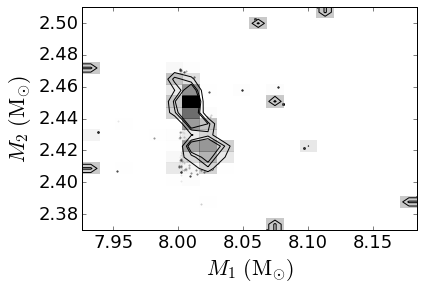

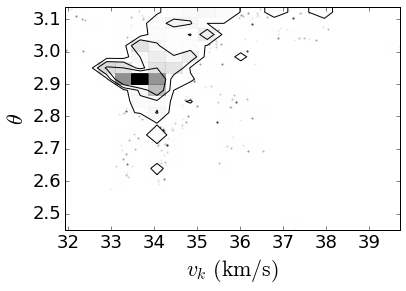

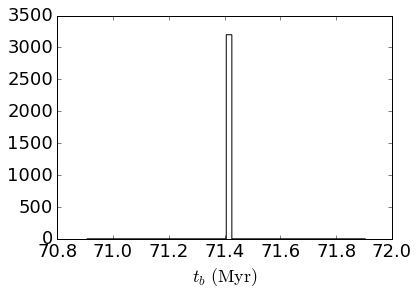

In [16]:
plt.rc('font', size=18)

M1 = sampler.flatchain.T[0]
M2 = sampler.flatchain.T[1]
corner.hist2d(M1, M2)
plt.xlabel(r'$M_1\ ({\rm M_{\odot}})$', fontsize=22)
plt.ylabel(r'$M_2\ ({\rm M_{\odot}})$', fontsize=22)
plt.show()

v_k = sampler.flatchain.T[4]
theta = sampler.flatchain.T[5]
corner.hist2d(v_k, theta)
plt.xlabel(r'$v_k\ ({\rm km/s})$', fontsize=22)
plt.ylabel(r'$\theta$', fontsize=22)
plt.show()

t_b = sampler.flatchain.T[9]
plt.hist(t_b, histtype='step', color='k', bins=50)
plt.xlabel(r'$t_b\ ({\rm Myr})$')
plt.show()

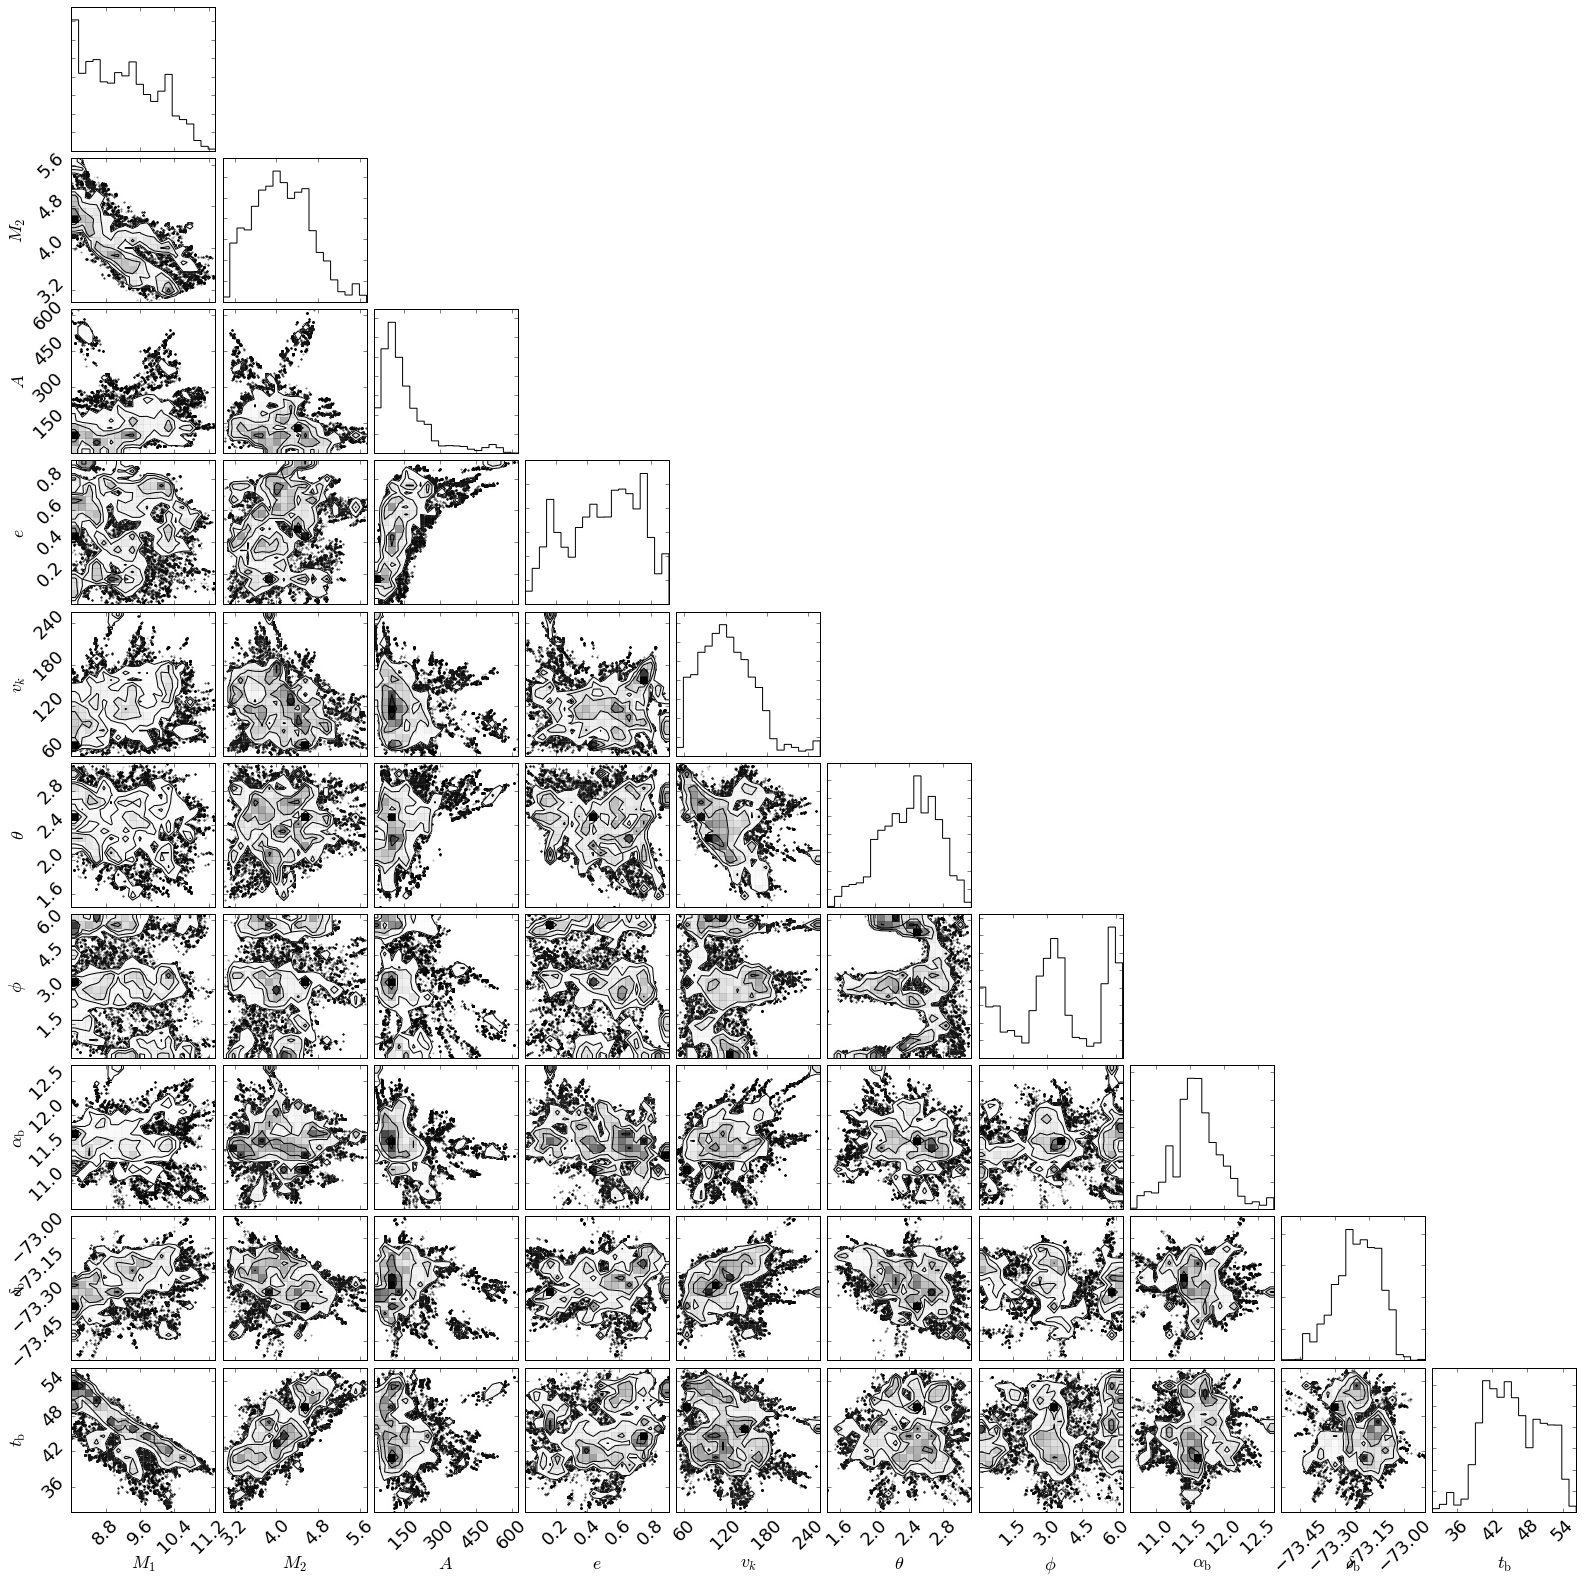

In [10]:

labels = [r"$M_1$", r"$M_2$", r"$A$", r"$e$", r"$v_k$", r"$\theta$", r"$\phi$", r"$\alpha_{\rm b}$", r"$\delta_{\rm b}$", r"$t_{\rm b}$"]
fig = corner.corner(sampler.flatchain, labels=labels)

plt.rc('font', size=18)

plt.show()
#plt.savefig('../figures/J0045_corner.pdf')

plt.rc('font', size=10)



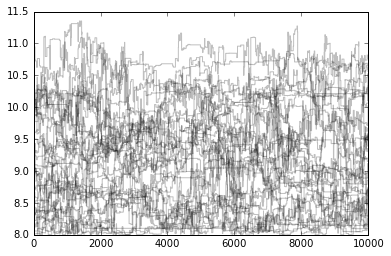

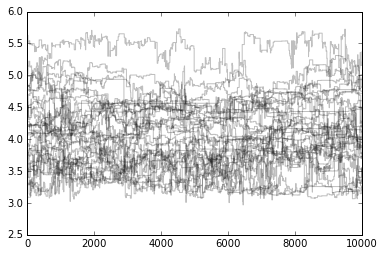

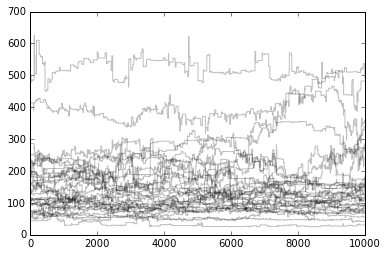

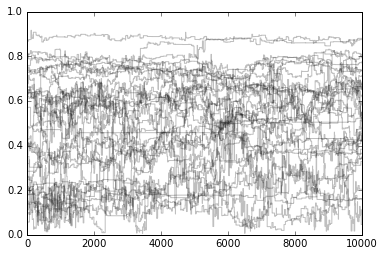

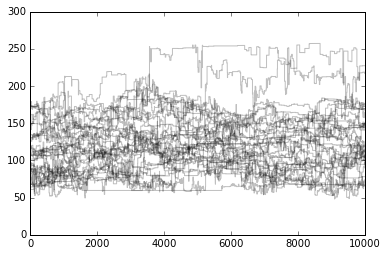

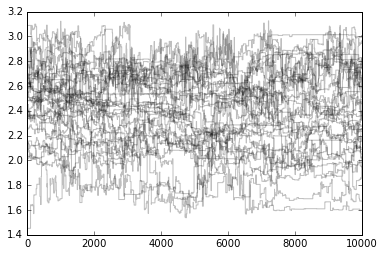

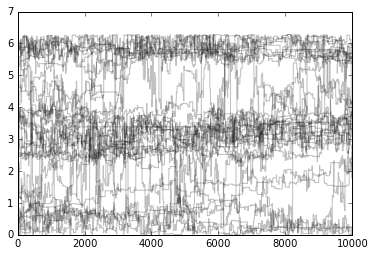

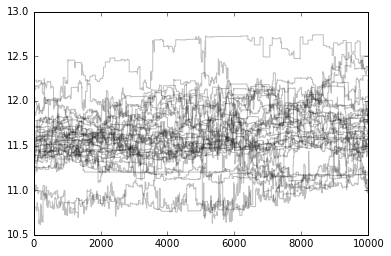

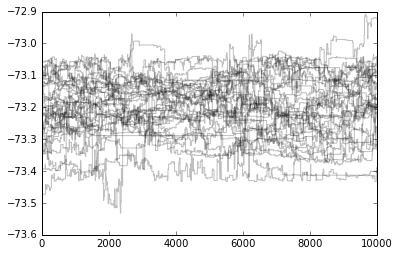

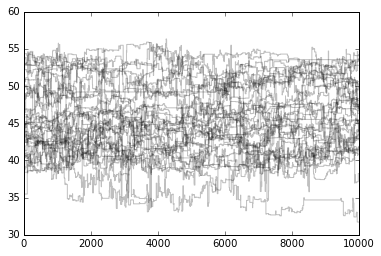

In [11]:
for i in range(sampler.dim):
    plt.figure()
    for chain in sampler.chain[...,i]:
        plt.plot(chain, alpha=0.25, color='k', drawstyle='steps')
        
plt.show()
#plt.savefig('../figures/J0045_chains.pdf')
        

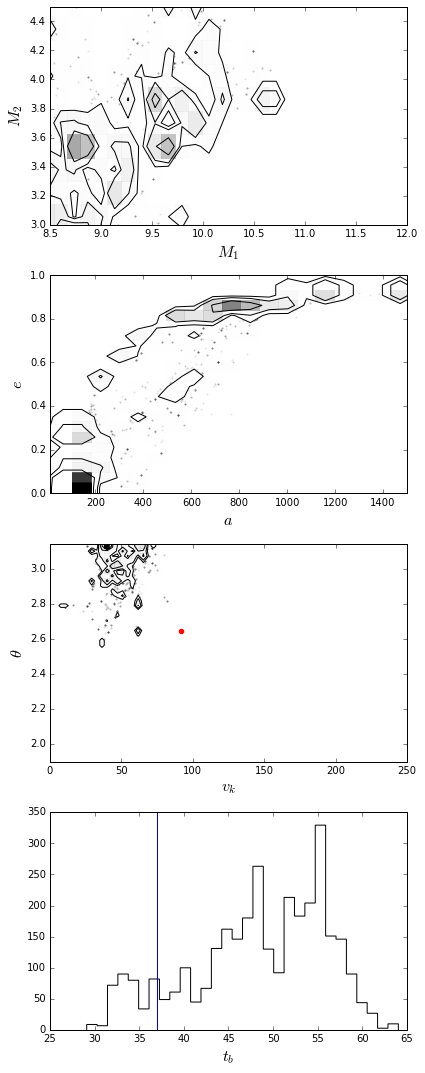

In [14]:
plt.figure(figsize=(6,15))

# Orbital period
plt.subplot(4,1,1)
corner.hist2d(sampler.flatchain.T[0], sampler.flatchain.T[1])
plt.scatter(init_params_J0045["M1"], init_params_J0045["M2"], color='r')
plt.xlabel(r"$M_1$", size=16)
plt.ylabel(r"$M_2$", size=16)
plt.xlim(8.5, 12.0)
plt.ylim(3.0, 4.5)

# Orbital eccentricity
plt.subplot(4,1,2)
corner.hist2d(sampler.flatchain.T[2], sampler.flatchain.T[3])
plt.scatter(init_params_J0045["A"], init_params_J0045["ecc"], color='r')
plt.xlabel(r"$a$", size=16)
plt.ylabel(r"$e$", size=16)
plt.xlim(10.0, 1500.0)
plt.ylim(0.0, 1.0)

# Companion mass
plt.subplot(4,1,3)
corner.hist2d(sampler.flatchain.T[4], sampler.flatchain.T[5])
plt.scatter(init_params_J0045["v_k"], init_params_J0045["theta"], color='r')
plt.xlabel(r"$v_k$", size=16)
plt.ylabel(r"$\theta$", size=16)
plt.xlim(0.0, 250.0)
plt.ylim(1.9, np.pi)

# Birth position
plt.subplot(4,1,4)
plt.hist(sampler.flatchain.T[9], histtype='step', color='k', bins=30)
for i in np.arange(len(init_params_J0045)):
    plt.axvline(init_params_J0045["t_b"][i])

plt.xlabel(r"$t_b$", size=16)

plt.tight_layout()

plt.savefig('../figures/J0045_MCMC_pop_synth_compare.pdf')
#plt.show()


## Test system 1

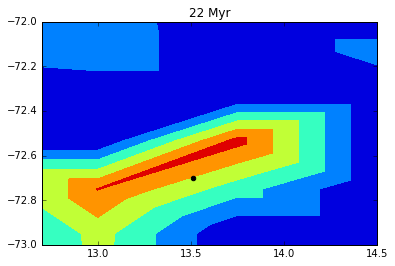

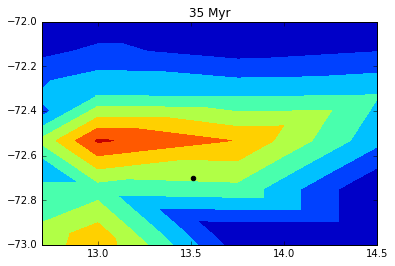

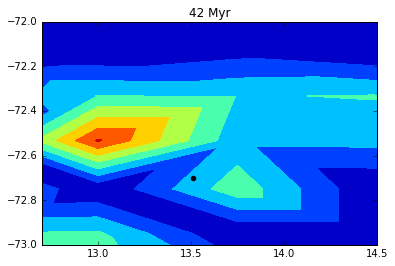

In [12]:
xlow = 12.7
xhigh = 14.5
ylow = -73.0
yhigh = -72.0

ra_tmp = 13.51
dec_tmp = -72.7

sf_history.get_SMC_plot(22.0)
plt.xlim(xlow,xhigh)
plt.ylim(ylow,yhigh)
plt.scatter(ra_tmp, dec_tmp, color='k')
plt.show()

sf_history.get_SMC_plot(35.0)
plt.xlim(xlow,xhigh)
plt.ylim(ylow,yhigh)
plt.scatter(ra_tmp, dec_tmp, color='k')
plt.show()

sf_history.get_SMC_plot(42.0)
plt.xlim(xlow,xhigh)
plt.ylim(ylow,yhigh)
plt.scatter(ra_tmp, dec_tmp, color='k')
plt.show()

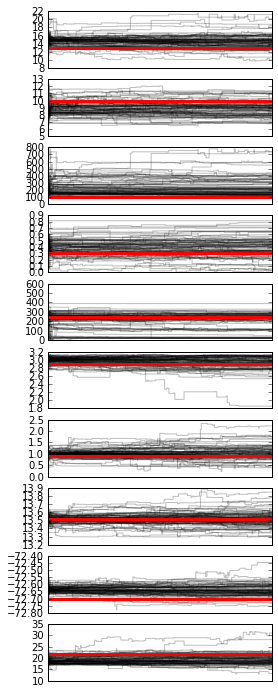

In [17]:


fig = plt.figure(figsize=(4, 12))

for i in range(sampler.dim):
    plt.subplot(sampler.dim, 1, i+1)

    for chain in sampler.chain[...,i]:
        plt.plot(chain, alpha=0.25, color='k', drawstyle='steps')
    
    plt.xticks([])
    plt.axhline(x[i], color='r', linewidth=3)
        
plt.show()
#plt.savefig('../figures/J0045_chains.pdf')



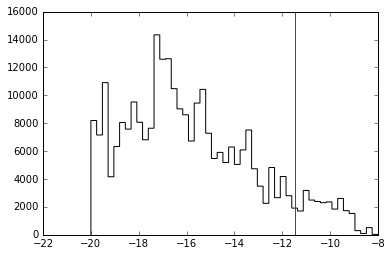

In [22]:
plt.hist(sampler.lnprobability.ravel(), histtype='step', color='k', bins=50, range=(-20, -8))
plt.xlim(-22, -8)

plt.axvline(-11.45, color='r')
plt.show()

### Create a corner plot of only those posteriors with high probabilities

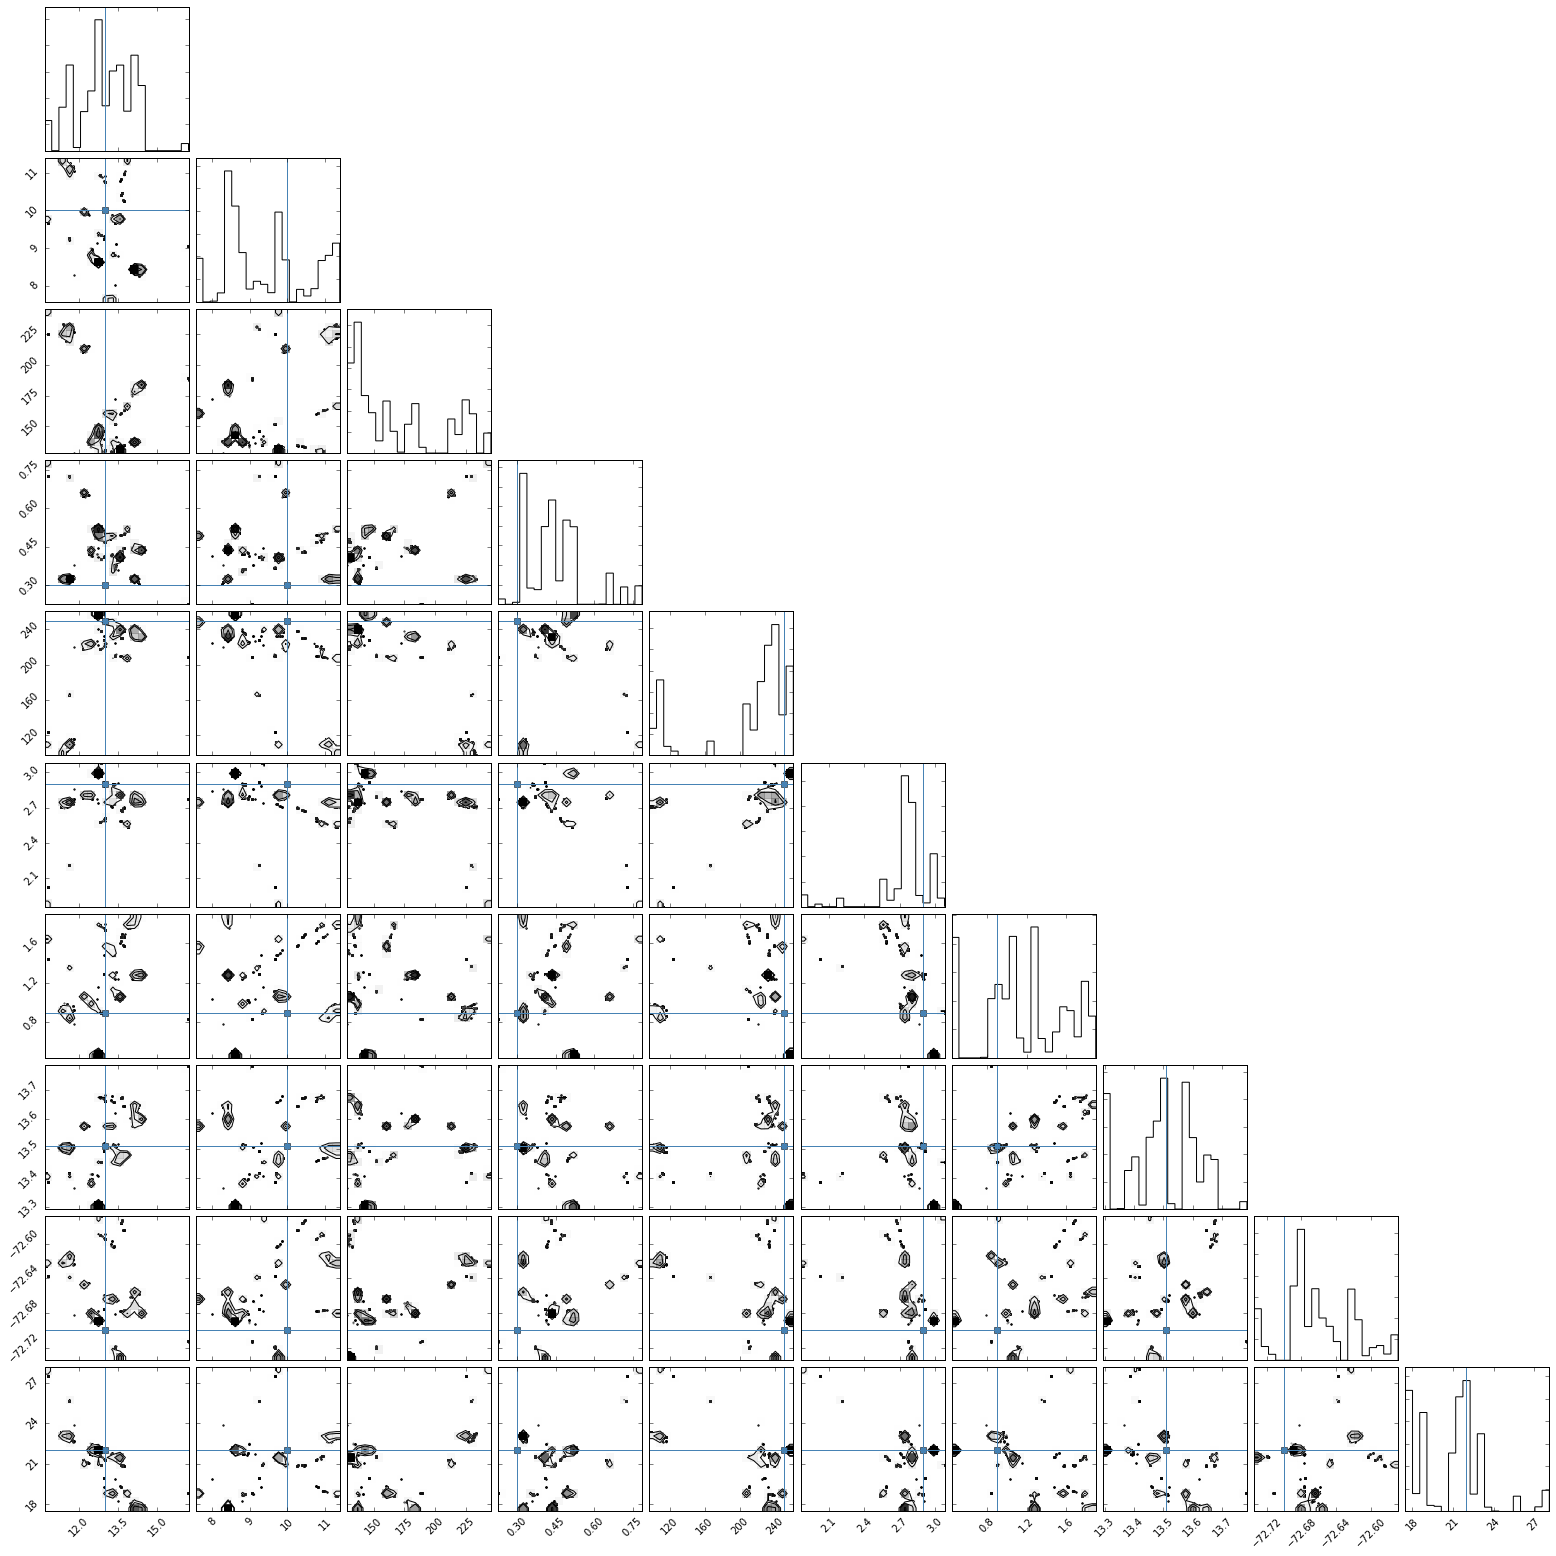

In [31]:
idx = np.array([], dtype='int')
for i in np.arange(len(sampler.lnprobability.ravel())):
    if sampler.lnprobability.ravel()[i] > -12.0: idx = np.append(idx, i)

#print idx

small_sampler = sampler.flatchain[idx]


fig = corner.corner(small_sampler, truths=x)

### Test likelihoods by individual variables independently

[-11.45292236]


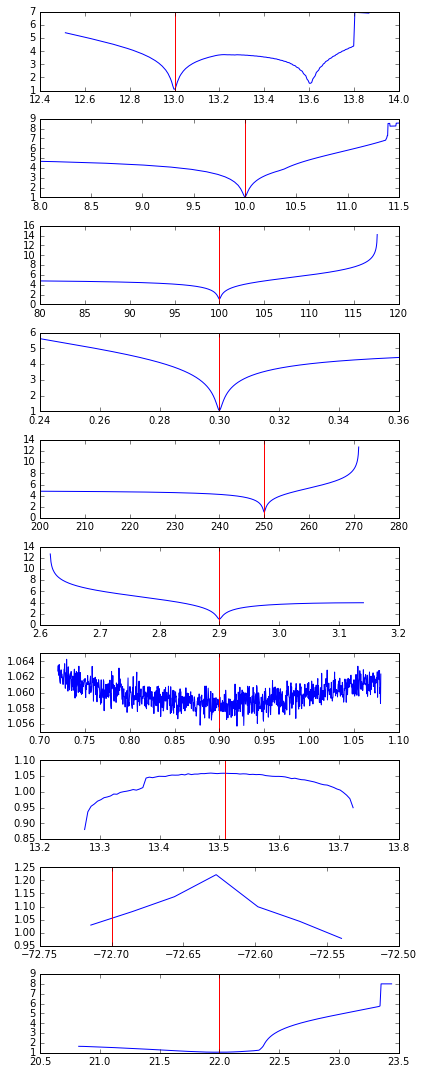

In [30]:
fig = plt.figure(figsize=(6,15))

print stats.ln_posterior(x,args)

for i in np.arange(len(x)):

    t = x[i]
    ln_out = np.array([])

    x_all = np.linspace(0.8*t, 1.2*t, 1000)
    for x_in in x_all:
        x_test = np.copy(x)
        x_test[i] = x_in
        ln_out = np.append(ln_out, stats.ln_posterior(tuple(x_test),args))
    
    plt.subplot(len(x),1,i+1)
    plt.plot(x_all, np.log10(-ln_out))
    plt.axvline(t, color='r')

    
plt.tight_layout()
    
plt.show()

### System 1 - Load pickled data

In [2]:
# Load pickled data
sampler = pickle.load( open( "../data/sys1_MCMC_sampler.obj", "rb" ) )

# Show data size
print "Sampler shape:", sampler.flatchain.shape

Sampler shape: (400000, 10)


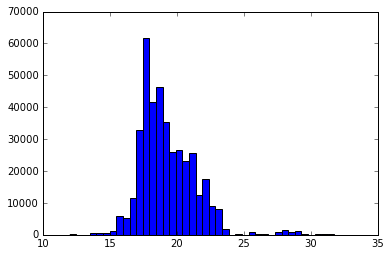

In [3]:
plt.hist(sampler.flatchain.T[9], bins=40)
plt.show()

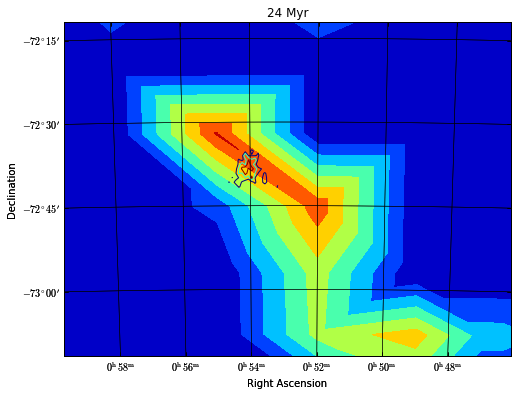

In [7]:
ra_dist = sampler.flatchain.T[7]
dec_dist = sampler.flatchain.T[8]

sf_history.get_SMC_plot_polar(24.0, ra_dist=ra_dist, dec_dist=dec_dist)

plt.show()

### Test System 2

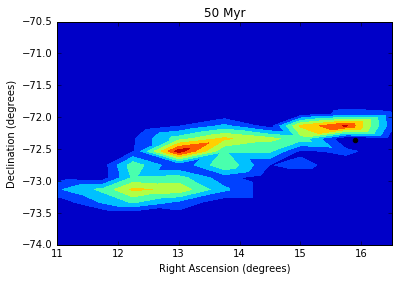

In [2]:
xlow = 11.0
xhigh = 16.5
ylow = -74.0
yhigh = -70.5

ra_tmp = 15.9
dec_tmp = -72.35

sf_history.get_SMC_plot(50.0)
plt.xlim(xlow,xhigh)
plt.ylim(ylow,yhigh)
plt.scatter(ra_tmp, dec_tmp, color='k')
plt.show()

In [2]:
# Define test system
M1 = 9.0
M2 = 4.0
A = 500.0
ecc = 0.5
v_k = 100.0
theta = 2.7
phi = 1.2
t_b = 50.0

M_1_obs, M_2_obs, L_x_obs, v_sys_obs, M2_dot_obs, A_obs, ecc_obs, theta_obs \
    = pop_synth.full_forward(M1,M2,A,ecc,v_k,theta,phi,t_b)

P_orb_obs = binary_evolve.A_to_P(M_1_obs, M_2_obs, A_obs)
ra, dec = 15.9, -72.25
ra_b, dec_b = 15.8, -72.1

print "A_current:", A_obs, "ecc_current:", ecc_obs

print "distance traveled:", theta_obs
print "coordinate distance:", sf_history.get_theta_proj_degree(ra, dec, ra_b, dec_b)

A_current: [ 694.48525832] ecc_current: 0.305448944617
distance traveled: [ 0.00166628]
coordinate distance: 0.00267195148574


In [4]:
# Print likelihoods and prior probabilities
x = M1, M2, A, ecc, v_k, theta, phi, ra_b, dec_b, t_b
y = ra, dec, M1, M2, A, ecc, v_k, theta, phi, ra_b, dec_b, t_b
args = M_2_obs, 1.0, P_orb_obs, 1.0, ecc_obs, 0.05, ra, dec

print "ln prior prob:", stats.ln_priors(y)
print "ln posterior:", stats.ln_posterior(x, args)

 ln prior prob: -12.5426567236
ln posterior: [-13.00911932]


[-13.13675027]


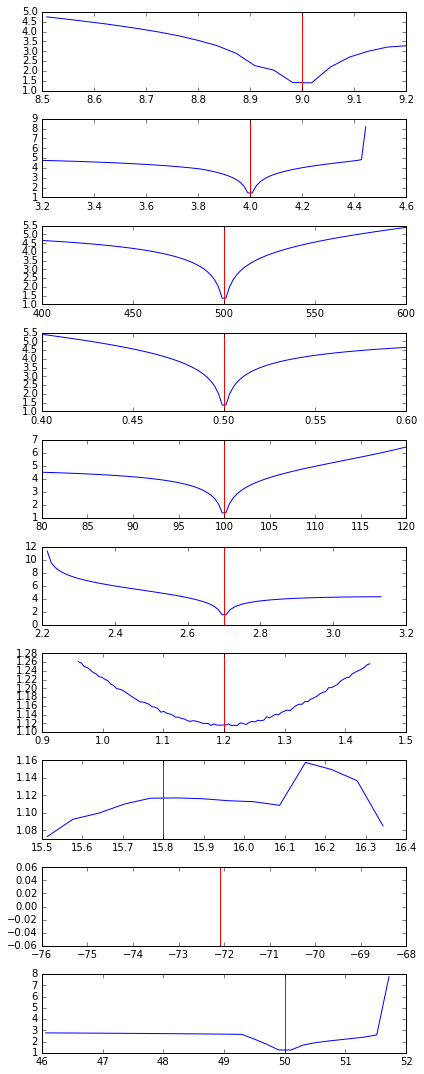

In [6]:
fig = plt.figure(figsize=(6,15))

print stats.ln_posterior(x,args)

for i in np.arange(len(x)):

    t = x[i]
    ln_out = np.array([])

    x_all = np.linspace(0.8*t, 1.2*t, 100)
    for x_in in x_all:
        x_test = np.copy(x)
        x_test[i] = x_in
        ln_out = np.append(ln_out, stats.ln_posterior(tuple(x_test),args))
    
    plt.subplot(len(x),1,i+1)
    plt.plot(x_all, np.log10(-ln_out))
    plt.axvline(t, color='r')

    
plt.tight_layout()
    
plt.show()

### Run J0045

In [ ]:
# Set J0045 parameters
coor_J0045 = SkyCoord('00h45m35.26s', '-73d19m03.32s')

ra_J0045 = coor_J0045.ra.degree
dec_J0045 = coor_J0045.dec.degree
M2_d_J0045 = 8.8  # M2 in Msun
M2_d_J0045_err = 1.8
P_orb_J0045 = 51.17  # P_orb in days
P_orb_J0045_err = 1.0
ecc_J0045 = 0.808  # eccentricity
ecc_J0045_err = 0.05



In [3]:
# Run J0045
start_time = time.time()

sampler = stats.run_emcee(M2_d_J0045, P_orb_J0045, ecc_J0045, ra_J0045, dec_J0045, \
    M2_d_err=M2_d_J0045_err, P_orb_obs_err=P_orb_J0045_err, ecc_obs_err=ecc_J0045_err, \
    nburn=10, nsteps=100)

print "Simulation took", time.time()-start_time, "seconds"

Simulation took 275.003803968 seconds


/Library/Python/2.7/site-packages/emcee/ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
/Library/Python/2.7/site-packages/emcee/ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))


### Run test system 1

In [2]:
# Define test system
M1 = 13.0
M2 = 10.0
A = 100.0
ecc = 0.3
v_k = 250.0
theta = 2.9
phi = 0.9
t_b = 22.0

M_1_obs, M_2_obs, L_x_obs, v_sys_obs, M2_dot_obs, A_obs, ecc_obs, theta_obs \
    = pop_synth.full_forward(M1,M2,A,ecc,v_k,theta,phi,t_b)

P_orb_obs = binary_evolve.A_to_P(M_1_obs, M_2_obs, A_obs)
ra, dec = 13.5, -72.63
ra_b, dec_b = 13.51, -72.7

(1.35, array([ 19.24870482]), array([  8.65067912e+32]), 23.831286023970563, array([  9.13636028e-14]), array([ 678.43624838]), 0.56296814282272567, array([ 0.00189932]))
[ 19.24870482] [ 454.65379462] 0.562968142823
-10.7895948886 [-11.45401788]


In [16]:
# Run test system
start_time = time.time()

sampler = stats.run_emcee(M_2_obs, P_orb_obs, ecc_obs, ra, dec, \
    M2_d_err=1.0, P_orb_obs_err=1.0, ecc_obs_err=0.05, \
    nburn=10, nsteps=5000)

print "Simulation took", time.time()-start_time, "seconds"

Simulation took 12325.2641571 seconds


In [41]:
pickle.dump( sampler, open( "../data/sys1_MCMC_sampler.obj", "wb" ) )

### Run test system 2

In [7]:
# Define test system
M1 = 9.0
M2 = 4.0
A = 500.0
ecc = 0.5
v_k = 100.0
theta = 2.7
phi = 1.2
t_b = 50.0

M_1_obs, M_2_obs, L_x_obs, v_sys_obs, M2_dot_obs, A_obs, ecc_obs, theta_obs \
    = pop_synth.full_forward(M1,M2,A,ecc,v_k,theta,phi,t_b)

P_orb_obs = binary_evolve.A_to_P(M_1_obs, M_2_obs, A_obs)
ra, dec = 15.9, -72.25
ra_b, dec_b = 15.8, -72.1

In [8]:
# Run test system
start_time = time.time()

sampler = stats.run_emcee(M_2_obs, P_orb_obs, ecc_obs, ra, dec, \
    M2_d_err=1.0, P_orb_obs_err=1.0, ecc_obs_err=0.05, \
    nburn=10, nsteps=10)

print "Simulation took", time.time()-start_time, "seconds"

Simulation took 106.489074945 seconds


/Library/Python/2.7/site-packages/emcee/ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
/Library/Python/2.7/site-packages/emcee/ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))


In [ ]:
pickle.dump( sampler, open( "../data/sys2_MCMC_sampler.obj", "wb" ) )